<a href="https://colab.research.google.com/github/matheusfigueiredoo/SUPER-IoT-Cybersecurity_MQTT/blob/main/svm_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/train_processed.pkl")
test = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/test_processed.pkl")

print(train['target'].value_counts())
print("\n")
print(test['target'].value_counts())

target
malicioso     2800000
legitimate    2800000
Name: count, dtype: int64


target
malicioso     1200000
legitimate    1200000
Name: count, dtype: int64


In [3]:
columns = [
    'tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
    'mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conack.val',
    'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.qos',
    'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.uname',
    'mqtt.conflag.willflag', 'mqtt.conflags', 'mqtt.dupflag',
    'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
    'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
    'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.ver',
    'mqtt.willmsg', 'mqtt.willmsg_len', 'mqtt.willtopic',
    'mqtt.willtopic_len', 'target'
]

single_value_columns = []

for col in columns:
    if train[col].nunique() == 1:
        single_value_columns.append(col)

print("Colunas com apenas um valor único:")
print(single_value_columns)

train = train.drop(columns=single_value_columns)
print(train.shape)
print("\n")
print(train.columns)

Colunas com apenas um valor único:
['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conack.val', 'mqtt.conflag.passwd', 'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.uname', 'mqtt.conflag.willflag', 'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len', 'mqtt.willtopic', 'mqtt.willtopic_len']
(5600000, 18)


Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.dupflag',
       'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
       'mqtt.ver', 'target'],
      dtype='object')


In [4]:
columns = [
    'tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
    'mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conack.val',
    'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.qos',
    'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.uname',
    'mqtt.conflag.willflag', 'mqtt.conflags', 'mqtt.dupflag',
    'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
    'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
    'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.ver',
    'mqtt.willmsg', 'mqtt.willmsg_len', 'mqtt.willtopic',
    'mqtt.willtopic_len', 'target'
]

single_value_columns = []

for col in columns:
    if test[col].nunique() == 1:
        single_value_columns.append(col)

print("Colunas com apenas um valor único:")
print(single_value_columns)

test = test.drop(columns=single_value_columns)
print(test.shape)
print("\n")
print(test.columns)

Colunas com apenas um valor único:
['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conack.val', 'mqtt.conflag.passwd', 'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.uname', 'mqtt.conflag.willflag', 'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len', 'mqtt.willtopic', 'mqtt.willtopic_len']
(2400000, 18)


Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.dupflag',
       'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
       'mqtt.ver', 'target'],
      dtype='object')


In [5]:
normal_train = []
attack_train = []
normal_test = []
attack_test = []

for i in train.index:
    if train['target'][i] == 'legitimate':
        normal_train.append(i)
    else:
        attack_train.append(i)

for i in test.index:
    if test['target'][i] == 'legitimate':
        normal_test.append(i)
    else:
        attack_test.append(i)

normal_train = normal_train[:2780000]
attack_train = attack_train[:2780000]
normal_test = normal_test[:1190000]
attack_test = attack_test[:1190000]

train = train.drop(normal_train)
train = train.drop(attack_train)
test = test.drop(normal_test)
test = test.drop(attack_test)

print(train['target'].value_counts())
print("\n")
print(test['target'].value_counts())

target
malicioso     20000
legitimate    20000
Name: count, dtype: int64


target
malicioso     10000
legitimate    10000
Name: count, dtype: int64


In [6]:
# rotulação

for i in train.index:
    if train['target'][i] == 'legitimate':
        train.at[i, 'target'] = '0'
    else:
        train.at[i, 'target'] = '1'

for i in test.index:
    if test['target'][i] == 'legitimate':
        test.at[i, 'target'] = '0'
    else:
        test.at[i, 'target'] = '1'

print(train['target'].unique())
print(test['target'].unique())

['1' '0']
['1' '0']


In [7]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()


categorical_columns = [col for col in train.columns if train[col].dtype == 'object']
categorical_columns = [col for col in test.columns if test[col].dtype == 'object']


for col in categorical_columns:
    train[col] = label.fit_transform(train[col].astype(str))
    test[col] = label.fit_transform(test[col].astype(str))

print("executado")

executado


In [8]:
X_train = train.iloc[:,:-1]
y_train = train['target']
X_test = test.iloc[:,:-1]
y_test = test['target']

# print(type(X_train))
# print(type(X_test))
# print(type(y_train))
# print(type(y_test))

# X_train = X_train.values
# X_test = X_test.values
# y_train = y_train.values
# y_test = y_test.values

# print(type(X_train))
# print(type(X_test))
# print(type(y_train))
# print(type(y_test))

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("executado")

executado


In [10]:
# bibliotecas dos modelos

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

print("executado")

executado


Accuracy train:  0.813075
Accuracy test: 0.80995

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.62      0.77     10000
           1       0.73      1.00      0.84     10000

    accuracy                           0.81     20000
   macro avg       0.86      0.81      0.80     20000
weighted avg       0.86      0.81      0.80     20000





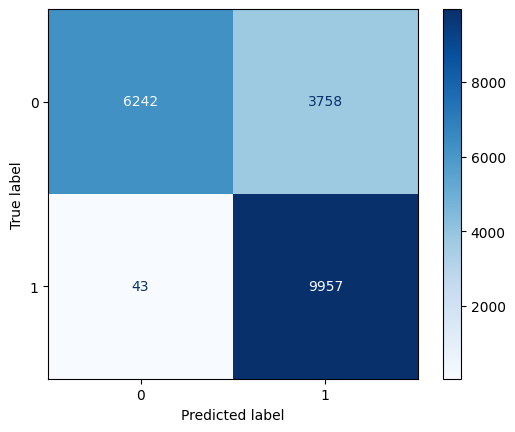

In [11]:
# SVM

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)

print("Accuracy train: ", svm_model.score(X_train, y_train))
print("Accuracy test:", svm_model.score(X_test, y_test))

# -------------------------------------------------------------------------------------------------------

print("\nClassification Report:\n", classification_report(y_test, y_pred)) # table classification report
print("\n")

# -------------------------------------------------------------------------------------------------------

ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap="Blues") # confusion matrix

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_train_10 = selector.fit_transform(X_train, y_train)

selected_features = train.iloc[:,:-1].columns[selector.get_support()]
print("Features selecionadas:", selected_features)

Features selecionadas: Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
       'mqtt.dupflag', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.qos'],
      dtype='object')


Testando com as 10 features mais importantes

In [14]:
# ajustando o conjunto de teste
columns_10 = ['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
       'mqtt.dupflag', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.qos']

X_test_10 = test[columns_10]
print(X_train_10.shape)
print(X_test_10.shape)

(40000, 10)
(20000, 10)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy train:  0.812675


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy test: 0.5022

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.01     10000
           1       0.50      1.00      0.67     10000

    accuracy                           0.50     20000
   macro avg       0.75      0.50      0.34     20000
weighted avg       0.75      0.50      0.34     20000





/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


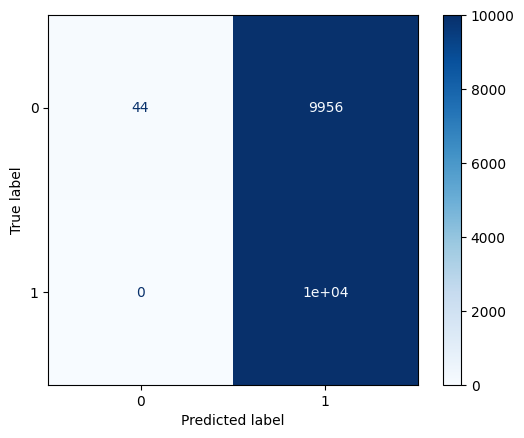

In [15]:
svm_model.fit(X_train_10, y_train)

y_pred_10 = svm_model.predict(X_test_10)

print("Accuracy train: ", svm_model.score(X_train_10, y_train))
print("Accuracy test:", svm_model.score(X_test_10, y_test))

# -------------------------------------------------------------------------------------------------------

print("\nClassification Report:\n", classification_report(y_test, y_pred_10)) # table classification report
print("\n")

# -------------------------------------------------------------------------------------------------------

ConfusionMatrixDisplay.from_estimator(svm_model, X_test_10, y_test, cmap="Blues") # confusion matrix

Testando com 5 features mais importantes

In [17]:
# reduzindo para 5

selector = SelectKBest(score_func=f_classif, k=5)
X_train_5 = selector.fit_transform(X_train_10, y_train)

c = ['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
       'mqtt.dupflag', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.qos']

selected_features = train[c].columns[selector.get_support()]
print("Features selecionadas:", selected_features)

Features selecionadas: Index(['tcp.len', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid', 'mqtt.qos'], dtype='object')


In [18]:
columns_5 = ['tcp.len', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid', 'mqtt.qos']

X_test_5 = test[columns_5]

print(X_train_5.shape)
print(X_test_5.shape)

(40000, 5)
(20000, 5)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy train:  0.8042


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy test: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.50      1.00      0.67     10000

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.33     20000
weighted avg       0.25      0.50      0.33     20000





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/b

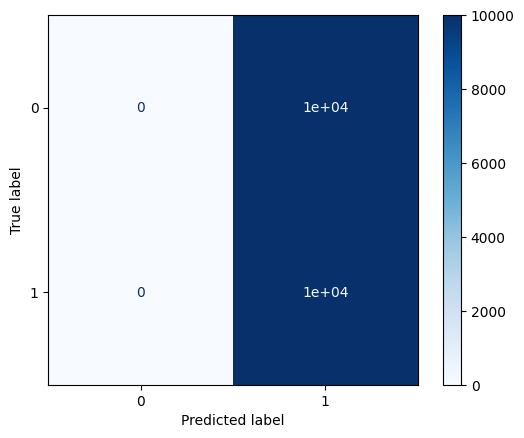

In [19]:
# teste com 5 features
svm_model.fit(X_train_5, y_train)

y_pred_5 = svm_model.predict(X_test_5)

print("Accuracy train: ", svm_model.score(X_train_5, y_train))
print("Accuracy test:", svm_model.score(X_test_5, y_test))

# -------------------------------------------------------------------------------------------------------

print("\nClassification Report:\n", classification_report(y_test, y_pred_5)) # table classification report
print("\n")

# -------------------------------------------------------------------------------------------------------

ConfusionMatrixDisplay.from_estimator(svm_model, X_test_5, y_test, cmap="Blues") # confusion matrix